In [1]:
# -*- coding: utf-8 -*-
# This code is written in Python 3.7. Install the required packages using:
# pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.preprocessing import LabelEncoder
import time

# ---------------------------- Helper Functions ----------------------------
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return performance metrics."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


def plot_confusion_matrix(y_true, y_pred, classes, title):
    """Plot and display a confusion matrix."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [2]:

# ---------------------------- Data Preprocessing ----------------------------
df = pd.read_csv('/home/ibibers@ads.iu.edu/IDS_Datasets/Combined_datasets/CICIDS2017_combined_dataset.csv')

df = df.drop_duplicates()
df.rename(columns=lambda x: x.lstrip(), inplace=True)
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean())

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

dropped_cols = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = df.drop(columns=dropped_cols, axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:

# ---------------------------- Feature Selection ----------------------------
# Top features selected using Information Gain
IGtop_5_features = ['Average Packet Size', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Total Length of Bwd Packets']
IGtop_10_features = IGtop_5_features + ['Subflow Bwd Bytes', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes']

# Top features selected using K-best
Kbest_top_5_features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Std']
Kbest_top_10_features = Kbest_top_5_features + ['Fwd IAT Max', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance']

# Subset data based on feature selection
datasets = {
    "All Features": (X_train, X_test),
    "IG Top 5 Features": (X_train[IGtop_5_features], X_test[IGtop_5_features]),
    "IG Top 10 Features": (X_train[IGtop_10_features], X_test[IGtop_10_features]),
    "KBest Top 5 Features": (X_train[Kbest_top_5_features], X_test[Kbest_top_5_features]),
    "KBest Top 10 Features": (X_train[Kbest_top_10_features], X_test[Kbest_top_10_features]),
}



----- Training MLPClassifier for All Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MLPClassifier (All Features) Metrics:
Accuracy: 0.8659393069599364
Precision: 0.7523179324034694
Recall: 0.8659393069599364
F1 Score: 0.8044939725075452


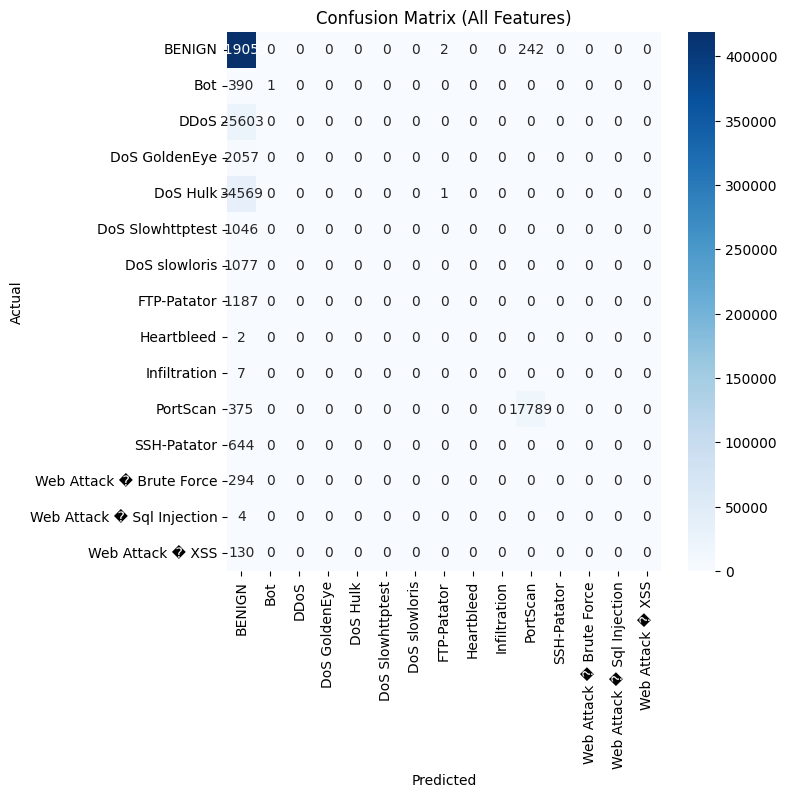


----- Training MLPClassifier for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MLPClassifier (IG Top 5 Features) Metrics:
Accuracy: 0.9302876467125099
Precision: 0.9448716692934087
Recall: 0.9302876467125099
F1 Score: 0.9256745602652657


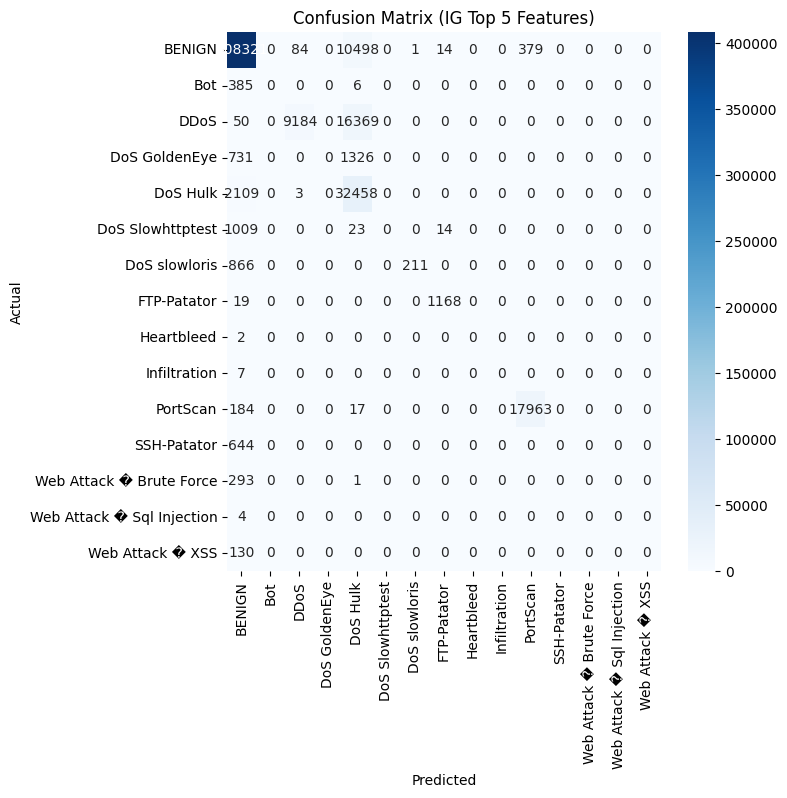


----- Training MLPClassifier for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MLPClassifier (IG Top 10 Features) Metrics:
Accuracy: 0.8826002580911169
Precision: 0.8564908902274699
Recall: 0.8826002580911169
F1 Score: 0.8476576297644627


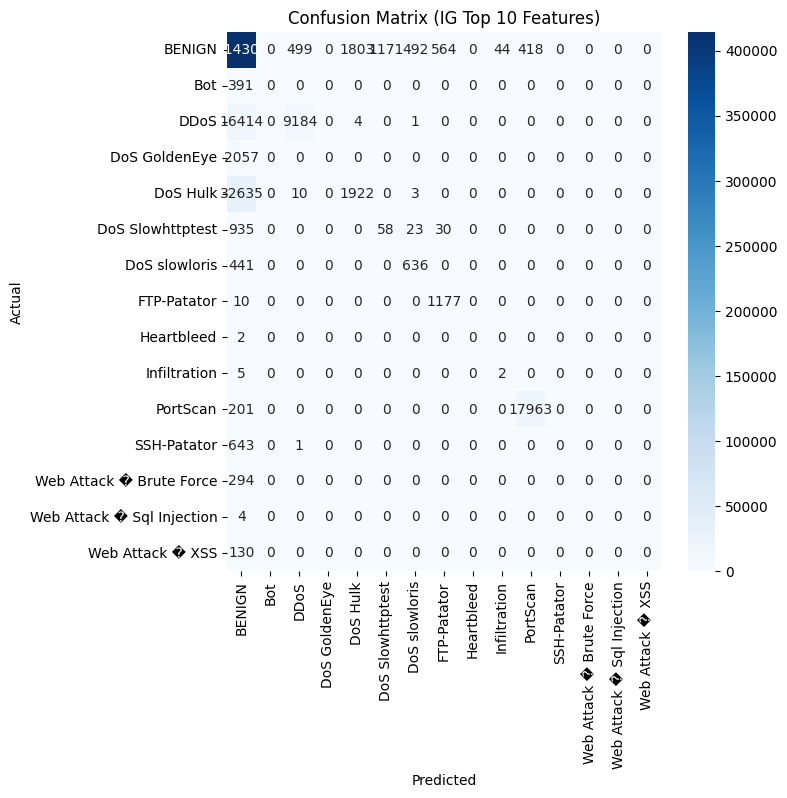


----- Training MLPClassifier for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MLPClassifier (KBest Top 5 Features) Metrics:
Accuracy: 0.8386355662245552
Precision: 0.826221227993909
Recall: 0.8386355662245552
F1 Score: 0.7827720590561987


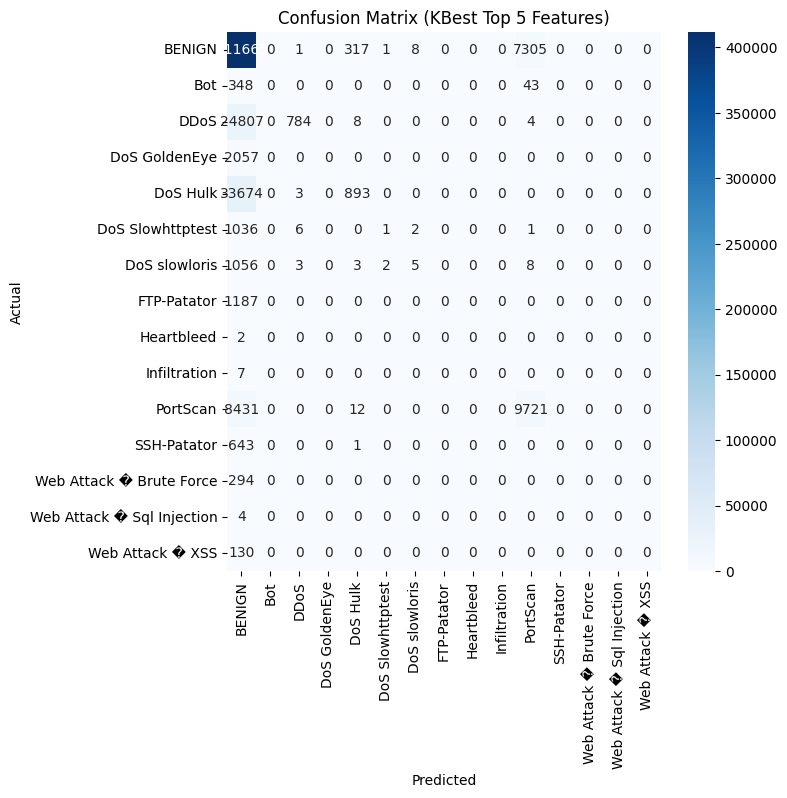


----- Training MLPClassifier for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MLPClassifier (KBest Top 10 Features) Metrics:
Accuracy: 0.8670830748127254
Precision: 0.8116383149596158
Recall: 0.8670830748127254
F1 Score: 0.8064549961139775


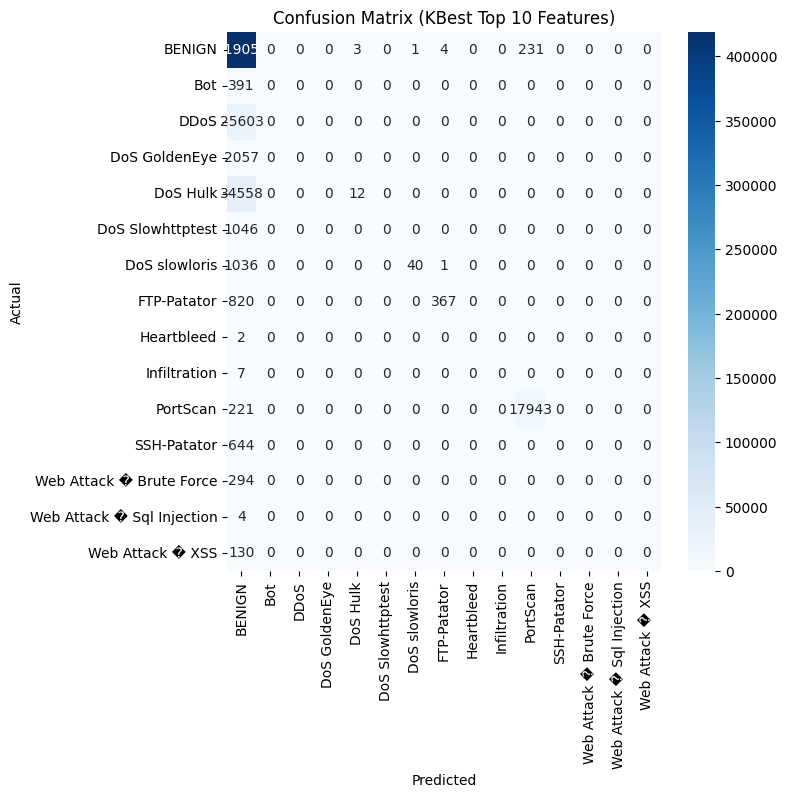

In [4]:

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
for name, (X_tr, X_te) in datasets.items():
    print(f"\n----- Training MLPClassifier for {name} -----")

    start_time = time.time()

    # model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42) 
    model = MLPClassifier(hidden_layer_sizes=(25,), max_iter=1000, random_state=42)
    model.fit(X_tr, y_train)

    train_end_time = time.time()

    y_pred = model.predict(X_te)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred, f"MLPClassifier ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred, le.classes_, f"Confusion Matrix ({name})")


In [5]:

# ---------------------------- Summary and Save Results ----------------------------
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)


summary.to_csv("mlp_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                   Model  Accuracy  Precision    Recall  \
0           MLPClassifier (All Features)  0.865939   0.752318  0.865939   
1      MLPClassifier (IG Top 5 Features)  0.930288   0.944872  0.930288   
2     MLPClassifier (IG Top 10 Features)  0.882600   0.856491  0.882600   
3   MLPClassifier (KBest Top 5 Features)  0.838636   0.826221  0.838636   
4  MLPClassifier (KBest Top 10 Features)  0.867083   0.811638  0.867083   

   F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.804494        1147.630905             0.517163     1148.148068  
1  0.925675         286.530217             0.227597      286.757814  
2  0.847658         343.171401             0.283831      343.455232  
3  0.782772         407.298925             0.229178      407.528104  
4  0.806455         309.981843             0.294086      310.275928  
